Cardiovascular diseases are caused because of improper functioning of our heart. 
# Types of CVDS-
* Heart Failure- blockage in blood flow to the heart
* Strokes- blockage in blood flow to the brain

# Causes of CVDS-
* High Blood Pressure- If a person's bp is high it can damage blood vessels.
* Smoking- The harmful substances in tobacco narrows the blood vessels.
* High Cholestrol- It narrows the blood vessels and increase the risk of blood clot in vessel.
* 
# Ways to avoid CVDS-
* Stop Smoking
* Have a balanced diet
* Do Yoga regularly- Specific pranayams for CVDS(https://www.youtube.com/watch?v=wrECGnoJPLg) are Bhastrika, kapalbhati, bahya.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns

# Modeling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

%matplotlib inline


In [3]:
heart_df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [11]:
heart_df.info()
heart_df.columns.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
heart_df=heart_df.drop(['serum_sodium','serum_creatinine','ejection_fraction'],axis='columns')

In [26]:
heart_df
heart_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
high_blood_pressure         0
platelets                   0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [65]:
heart_df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [129]:
heart_df.DEATH_EVENT.mean()

0.3210702341137124

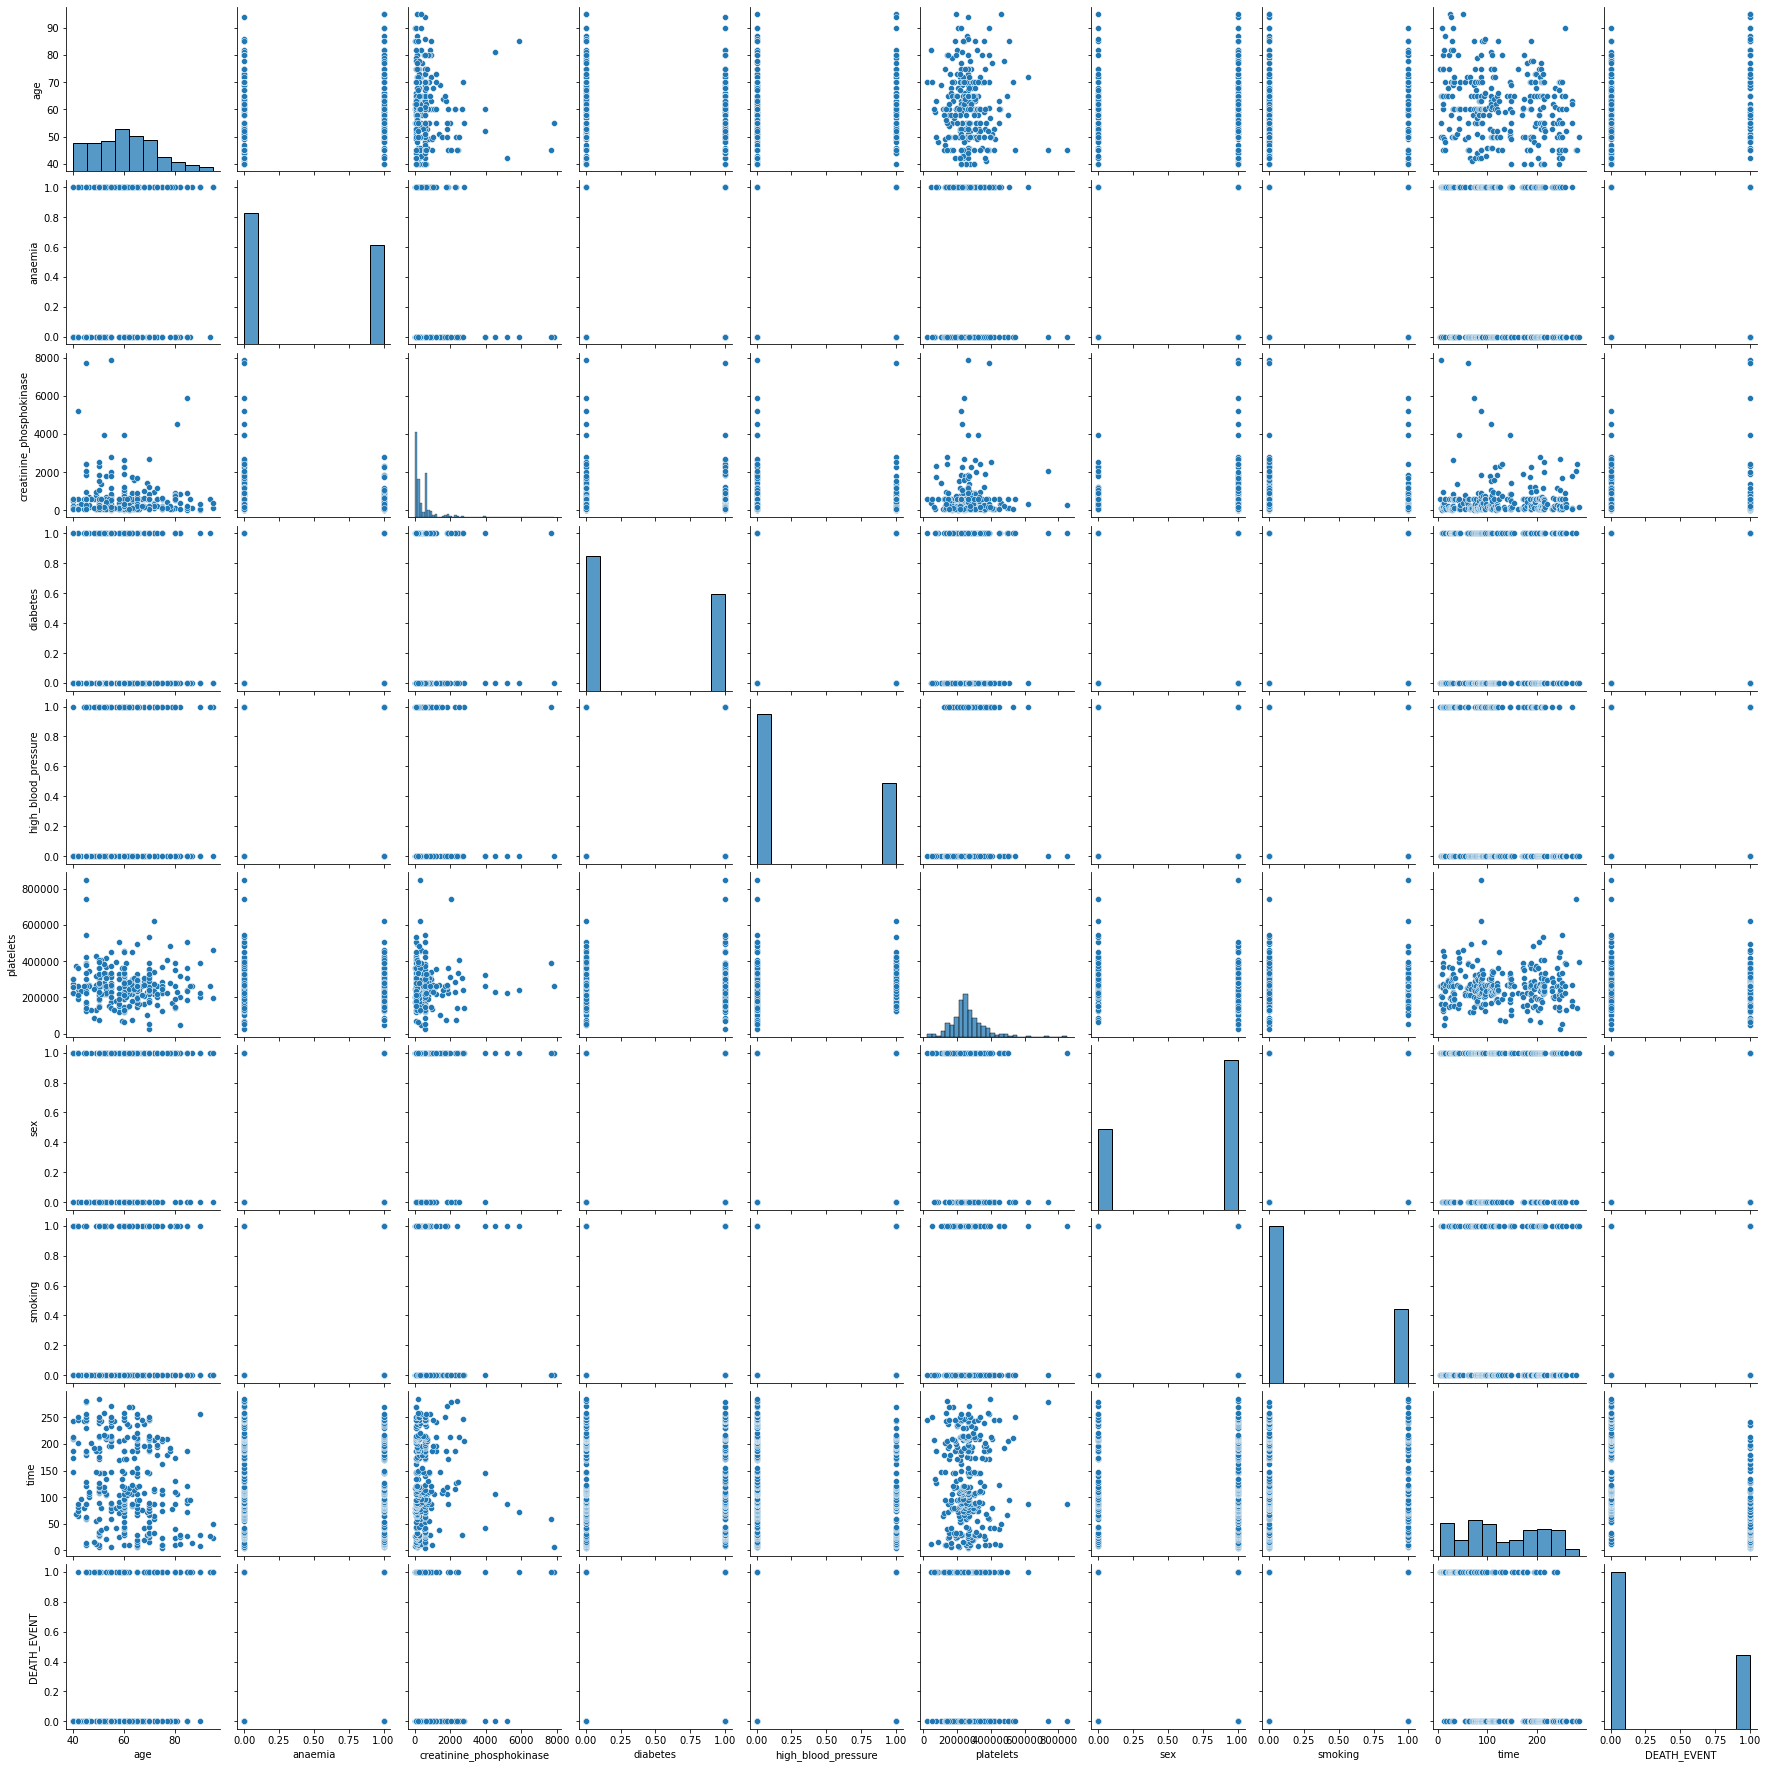

In [23]:
sns.pairplot(heart_df);

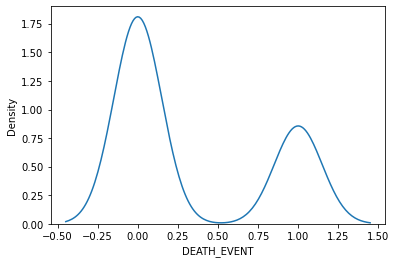

In [24]:
sns.kdeplot(heart_df.DEATH_EVENT)

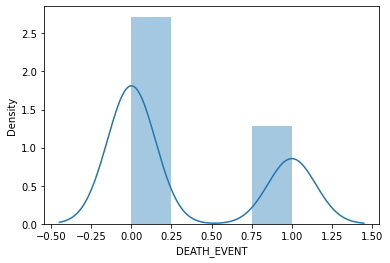

In [25]:
sns.distplot(heart_df.DEATH_EVENT)

# Feature Analysis

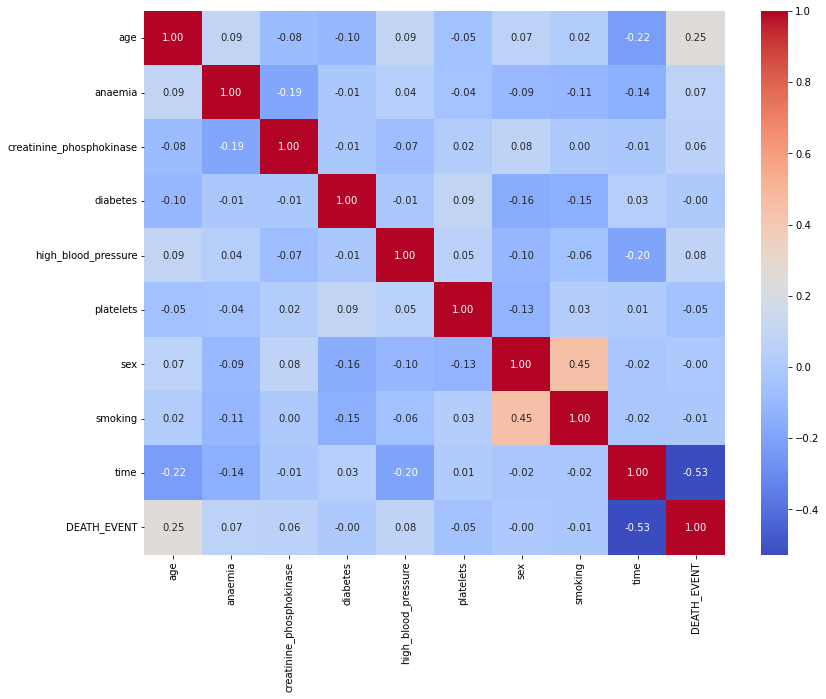

In [39]:
plt.figure(figsize=(13,10))
sns.heatmap(heart_df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


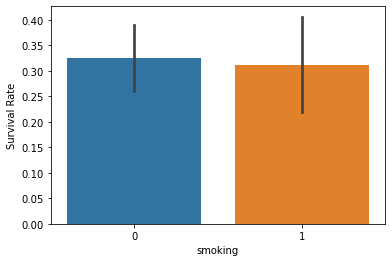

In [54]:
sns.barplot(x='smoking',y='DEATH_EVENT',data=heart_df)
plt.ylabel('Survival Rate');

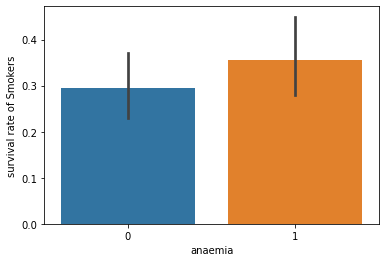

In [53]:
sns.barplot(x='anaemia',y='DEATH_EVENT',data=heart_df);
plt.ylabel("survival rate of Smokers");

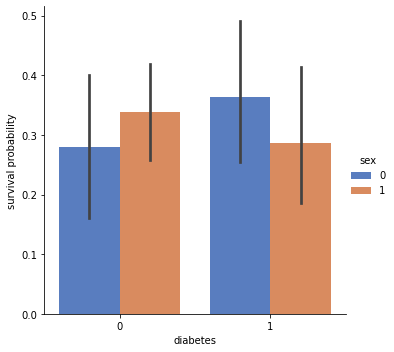

In [67]:
g = sns.catplot(x="diabetes", y="DEATH_EVENT", hue="sex", data=heart_df,
                   kind="bar", palette="muted")
g.set_ylabels("survival probability");

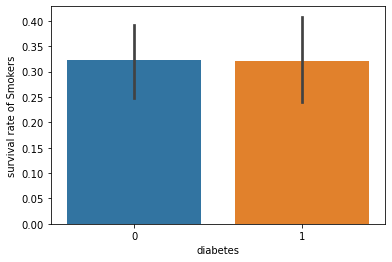

In [68]:
sns.barplot(x='diabetes',y='DEATH_EVENT',data=heart_df);
plt.ylabel("survival rate of Smokers");

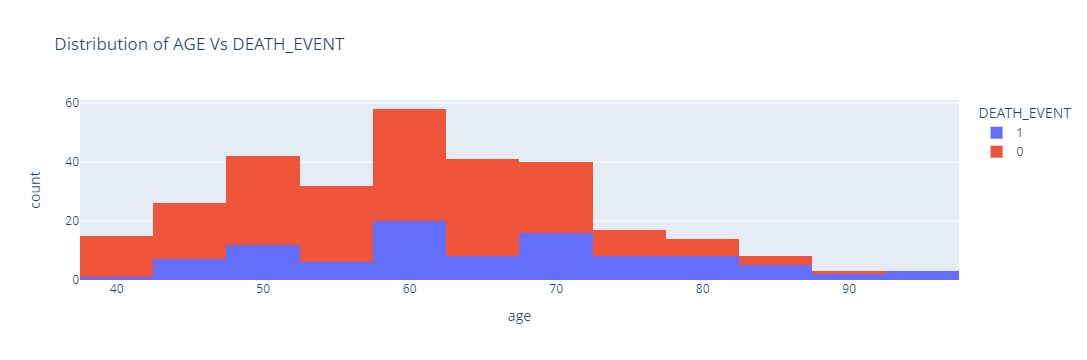

In [152]:
import plotly.express as px
fig = px.histogram(heart_df ,x="age", color="DEATH_EVENT", hover_data=heart_df, title ="Distribution of AGE Vs DEATH_EVENT"  )
fig.show()

# Modeling

In [77]:
X=heart_df.drop(['DEATH_EVENT'],axis='columns')
y=heart_df['DEATH_EVENT']

In [112]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=20)

In [89]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(model, train_x, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.803261,0.083617,LogisticRegression
1,0.732428,0.094863,DecisionTreeClassifier
2,0.744928,0.091728,AdaBoostClassifier
3,0.673732,0.014412,SVC
4,0.807428,0.062662,RandomForestClassifier
5,0.794928,0.080132,GradientBoostingClassifier
6,0.619384,0.062143,KNeighborsClassifier


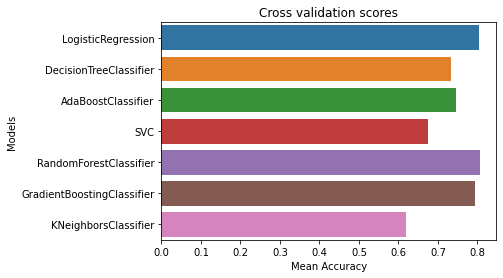

In [130]:
# Modeling step Test differents algorithms 
random_state = 32
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)